# <b>Malaria Detection using CNN model Notebook

Context
- Malaria is a contagious disease, responsible for 400,000 deaths over the world in 2019. 
- The diagnosis of malaria requires the examination of red blood cells by an experienced professional in order to identify parasitized cells. 
- It is a tedious process, and the diagnostic accuracy depends on the professional’s expertise, and therefore has a high inter-observer variability. 
- Applications of automated classification techniques using Machine learning (ML) and Artificial Intelligence (AI) have shown higher accuracy than manual classification
- A deadly disease such as Malaria, needs to be easily, timely and accurately diagnosed in order to save lives. Could an automated system help improve the accuracy and rapidity of Malaria diagnosis, and therefore help save lives?

Objective
- The goal is to build a computer vision model using ML and AI to accurately classify diseased and non-diseased red blood cell samples in order to accurately diagnose Malaria. 

Key questions
- Do we have a set of labeled data?
- Is our data balanced in terms of infection status (parasitized vs uninfected) in both the training and testing datasets? 
- What specific image pre-processing techniques can we use in computer vision to help accurately discriminate a parasitized and an uninfected red blood cell image? 


Problem formulation
- How to diagnose Malaria accurately and timely using machine learning classification algorithms.
- We are trying to solve a medical image classification problem using supervised learning since we have labeled data. The classification needs to be very accurate and avoid any false negatives, since missing a person who has a disease can be deadly. Therefore, recall should be very high. This model should also perform better than the current gold-standard (professional examination of samples under microscope) in order to replace it.

Decription
- There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


### <b>Loading libraries</b>

In [1]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [2]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)


In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### <b>Loading the data</b>

In [5]:
path = "C:/Users/fehri/Documents/MIT/Capstone Project/cell_imageszip.zip"


In [6]:

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images will be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [7]:
# Storing the path of the extracted "train" folder 
train_dir = 'C:/Users/fehri/Documents/MIT/Capstone Project/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [8]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [9]:
# Storing the path of the extracted "test" folder 
test_dir = 'C:/Users/fehri/Documents/MIT/Capstone Project/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [10]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

### <b> Checking the shape of train and test images

In [11]:
# Shape of images

print("Shape of train images:", train_images.shape)

print()

print("Shape of test images:", test_images.shape)



Shape of train images: (24958, 64, 64, 3)

Shape of test images: (2600, 64, 64, 3)


### <b> Checking the shape of train and test labels

In [12]:
# Shape of labels 
print("Shape of train labels:", train_labels.shape)

print()

print("Shape of test labels:", test_labels.shape)

Shape of train labels: (24958,)

Shape of test labels: (2600,)


Observations and insights:
- There are 24 958 train images and 2600 test images. Images have a size of 64 X 64, and are in color (RGB 3). Each train and test image has a label. 

### <b>Check the minimum and maximum range of pixel values for train and test images

In [13]:
# Try to use min and max function from numpy
print("min range of pixel values for the train images:", train_images.min())
print("max range of pixel values for the train images:", train_images.max())

print()
print("min range of pixel values for the test images:", train_images.min())
print("max range of pixel values for the test images:", train_images.max())

min range of pixel values for the train images: 0
max range of pixel values for the train images: 255

min range of pixel values for the test images: 0
max range of pixel values for the test images: 255


 ## Observations and insights:
- the images pixel values for the train and test data range from 0 - 255, so we are simply dividing all the pixel values by 255 to standardize all the images to have values between 0 - 1.


### <b> Counting the number of values in both uninfected and parasitized 

In [14]:
pd_train_labels = pd.DataFrame(train_labels)
pd_test_labels = pd.DataFrame(test_labels)

In [15]:
pd_train_labels.value_counts()

1    12582
0    12376
dtype: int64

## oberservations
- number of values in parazited group in the training set is 12582
- number of values in uninfected group in the training set is 12376

In [16]:
pd_test_labels.value_counts()

0    1300
1    1300
dtype: int64

## oberservations
- number of values in parazited group in the test set is 1300
- number of values in uninfected group in the test set is 12376

In [17]:
print ("number of values in parazited group",12582 + 1300)
print()
print("number of values in uninfected group",12376 + 1300)


number of values in parazited group 13882

number of values in uninfected group 13676


### <b>Normalize the images

In [18]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

#### <b> Observations and insights:
  - the images are now normalized and have values between 0 and 1. 

### <b> Plot to check if the data is balanced

In [19]:
pd_test_labels.columns =['Infection']
pd_train_labels.columns =['Infection']

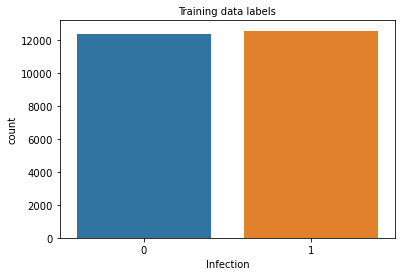

In [20]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced


# plotting count plot with Role column and hue as Academy
sns.countplot( x= 'Infection', data=pd_train_labels)

# display
plt.title('Training data labels', fontsize =10)
plt.show()


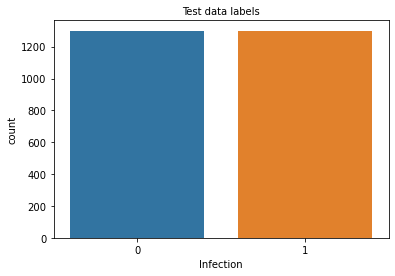

In [21]:

# plotting count plot with Role column and hue as Academy
sns.countplot( x= 'Infection', data=pd_test_labels)

# display
plt.title('Test data labels', fontsize =10)
plt.show()

#### <b> Observations and insights: 
- the labels are balanced between infected and non-infected in the training and test data

### <b>Data Exploration</b>
Let's visualize the images from the train data

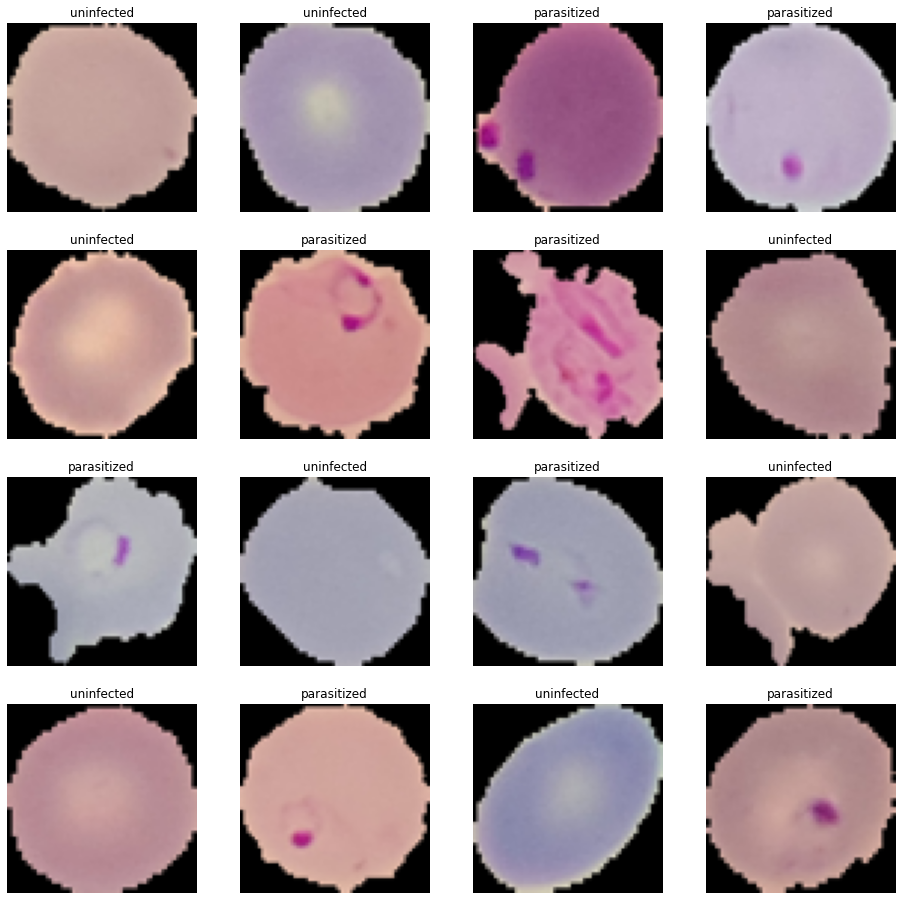

In [22]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

#### <b> Observations and insights:
- the parasitized cell seem to contain purple coloration inside the cell
- the unifected cells do not seem to contain any coloration inside the cell

### <b> Visualizing the images with subplot(6, 6) and figsize = (12, 12)

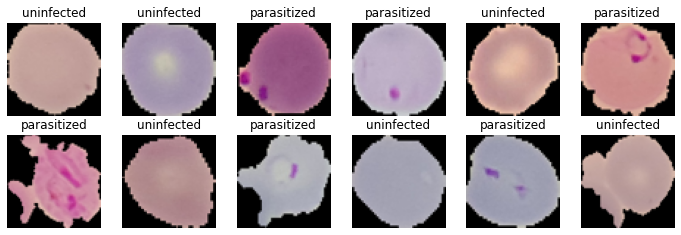

In [23]:

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 13):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


#### <b>Observations and insights:
- the parasitized cells seem to contain some nuclei purple coloration inside the cell
- the uninfected cells do not seem to contain any coloration inside the cell
- This seems to be the discriminating feature to accuretaly classify parasitized vs uninfected cells. 


### <b> Plotting the mean images for parasitized and uninfected

In [24]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

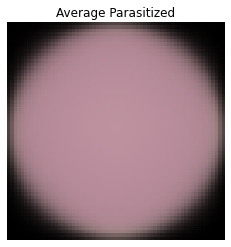

In [25]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
            parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

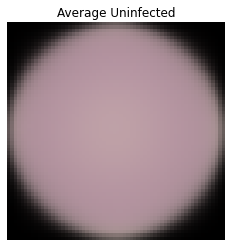

In [26]:
# Similarly write the code to find the mean image of uninfected

# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
            uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


#### <b> Observations and insights:
- Using the mean image for parasitized and uninfected makes the images indistinguishable, as the features distinguinshing both images are no longer perceptible. 
- This image pre-processing technique blurs the image too much, which make the 2 different cells indistinguishable, and therefore edge detection would not work anymore to accurately discriminate between the parasitized and uninfected cells.
Therefore, we will try other image pre-processing techniques


### <b>Converting RGB to HSV of Images using OpenCV

### <b> Converting the train data

In [27]:
!pip install opencv-python

In [28]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

    a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

    gfx.append(a)

gfx = np.array(gfx)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


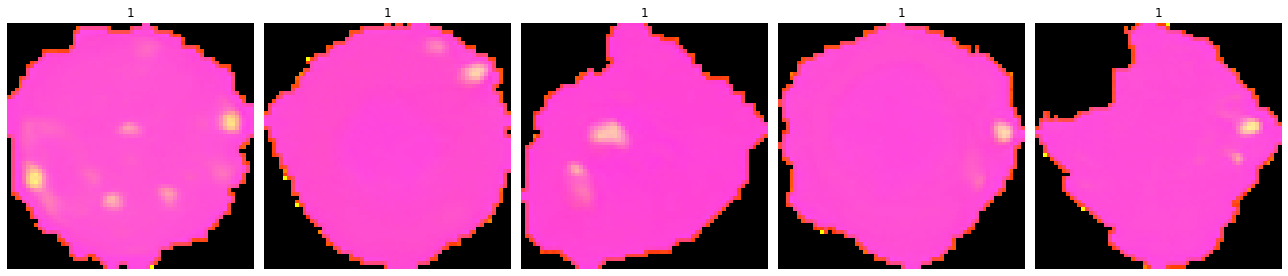

In [29]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

    Title = train_labels[i]

    ax[t].set_title(Title)

    ax[t].imshow(gfx[i])

    ax[t].set_axis_off()

    fig.tight_layout()

### <b> Converting the test data

In [30]:
# Similarly you can visualize for the images in the test data

gfx1=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):
    a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

    gfx1.append(a)

gfx1 = np.array(gfx1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


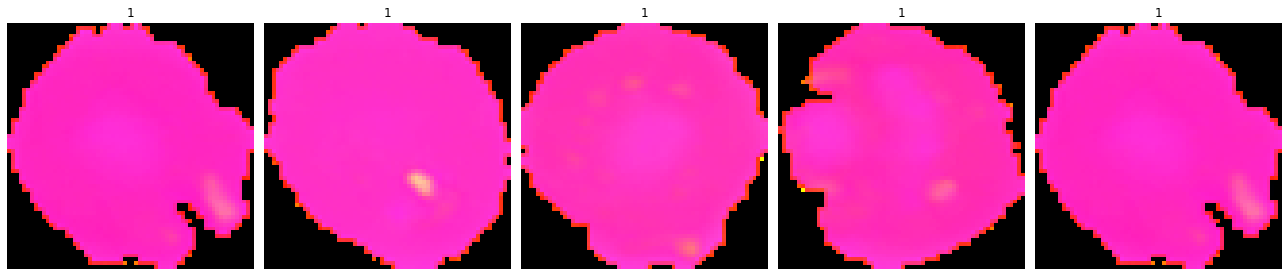

In [31]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

    Title = test_labels[i]

    ax[t].set_title(Title)

    ax[t].imshow(gfx1[i])

    ax[t].set_axis_off()

    fig.tight_layout()

#### <b>Observations and insights:
- We are trying to separate the color information from the image luminance using RGB to HSV transformation. In this situation, where color description plays an integral role, the HSV color model is often preferred over the RGB model.

### <b> Processing Images using Gaussian Blurring

### <b> Gaussian Blurring on train data

In [32]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

    b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

    gbx.append(b)

gbx = np.array(gbx)

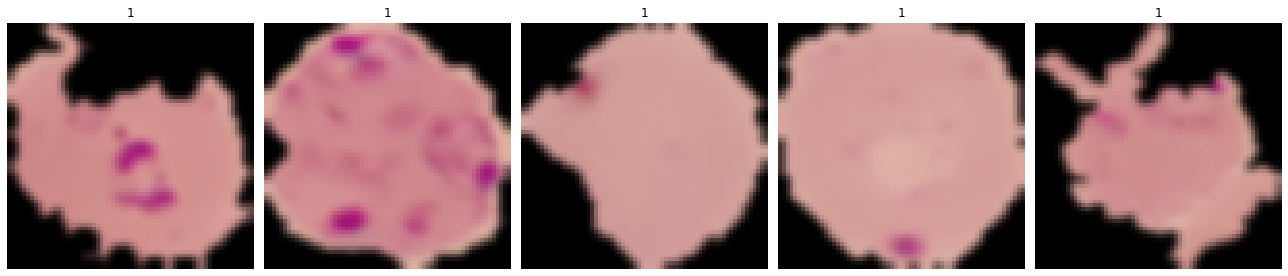

In [33]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

    Title = train_labels[i]

    ax[t].set_title(Title)


    ax[t].imshow(gbx[i])

    ax[t].set_axis_off()

    fig.tight_layout()

### <b> Gaussian Blurring on test data

In [34]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx2 = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

    b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

    gbx2.append(b)

gbx2 = np.array(gbx)

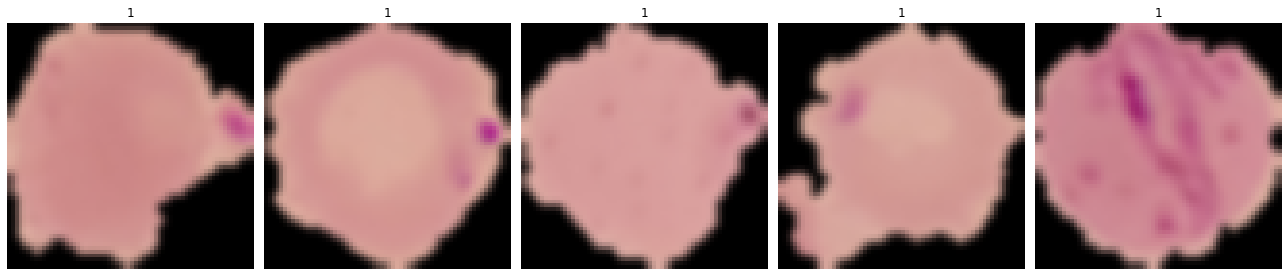

In [35]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

    Title = test_labels[i]

    ax[t].set_title(Title)


    ax[t].imshow(gbx2[i])

    ax[t].set_axis_off()

    fig.tight_layout()

#### **Observations and insights:**
- Gaussian blurring seem to conserve the charasteristics that make the parasitized image distinguishable from the uninfected image
- Gaussian blur reduces the noise of the image, which will allow for better edge detection since most edge detection algorithms are sensitive to noise. However, in this case, blurring does not seem particularly helpful, since  small changes in color like in the first picture above could become hard to detect. 


## **Proposed approach**

Potential techniques
- We will use a Convolutional Neural Network (CNN) to build this model. We will try different number of layers and activation functions
- We can also use Data Augmentation (using pre-trained models) to help improve our CNN model. 
- We can also try building different models using the RGB images, HSV images, or the Gaussian blur and see which models performs best. 

Overall solution design
- We will build 3 different models of a Convolutional Neural Network using the 3 potential techniques above and we will compare them in order to decide which model performs best

Measures of success
- For each model, we should explore the confusion matrix to calculate the precision and recall for each model. Both precision and recall should be high, but recall should be maximized since having false negatives means missing sick people, which could eventually die. 
- We will compare the accuracy for each model (correctly classifying the test data vs the trainign data with that specific model) to determine which model performs best. 
- We should also compare the precision, recall, and specificity of the selected model to the current gold standard (professional examination of red blood cells under microscope)


In [36]:
backend.clear_session() # Clearing backend for new model

In [37]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

###  Model 0

In [38]:
random.seed(42)

tf.random.set_seed(42)

In [39]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [40]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [41]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [42]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 32s 50ms/step - loss: 0.4306 - accuracy: 0.7965 - val_loss: 0.2188 - val_accuracy: 0.9056
Epoch 2/20
624/624 [==============================] - 31s 49ms/step - loss: 0.1167 - accuracy: 0.9578 - val_loss: 0.1338 - val_accuracy: 0.9814
Epoch 3/20
624/624 [==============================] - 31s 50ms/step - loss: 0.0862 - accuracy: 0.9713 - val_loss: 0.1231 - val_accuracy: 0.9782
Epoch 4/20
624/624 [==============================] - 31s 49ms/step - loss: 0.0757 - accuracy: 0.9758 - val_loss: 0.1079 - val_accuracy: 0.9756
Epoch 5/20
624/624 [==============================] - 31s 49ms/step - loss: 0.0704 - accuracy: 0.9765 - val_loss: 0.0948 - val_accuracy: 0.9784
Epoch 6/20
624/624 [==============================] - 31s 49ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0614 - val_accuracy: 0.9854
Epoch 7/20
624/624 [==============================] - 31s 49ms/step - loss: 0.0643 - accuracy: 0.9786 - val_loss: 0.0899 - val_accuracy:

In [43]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 10ms/step - loss: 0.0733 - accuracy: 0.9823

 Test_Accuracy:- 0.9823076725006104


82/82 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



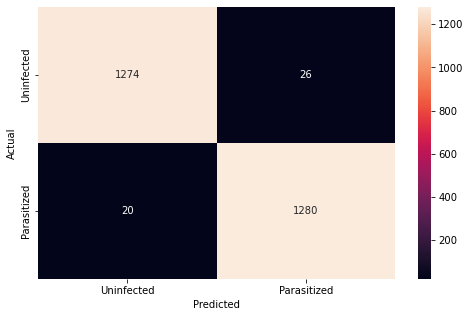

In [44]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [45]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

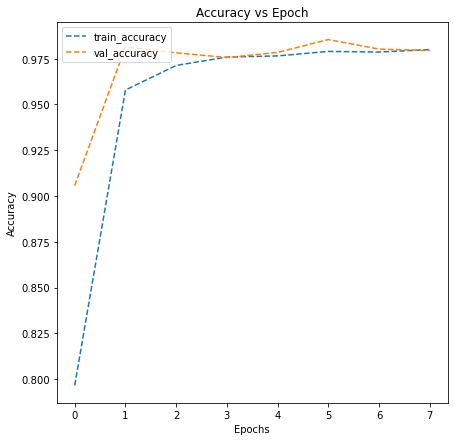

In [46]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

### <b> Model 1
#### <b> Trying to improve the performance of our model by adding new layers


In [47]:
backend.clear_session() # Clearing the backend for new model
random.seed(42)

tf.random.set_seed(42)

In [48]:
# Creating sequential model
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 


model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [49]:
model1.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [50]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [51]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 29s 46ms/step - loss: 0.3207 - accuracy: 0.8421 - val_loss: 0.1250 - val_accuracy: 0.9663
Epoch 2/20
624/624 [==============================] - 29s 46ms/step - loss: 0.0885 - accuracy: 0.9707 - val_loss: 0.0866 - val_accuracy: 0.9744
Epoch 3/20
624/624 [==============================] - 29s 46ms/step - loss: 0.0767 - accuracy: 0.9752 - val_loss: 0.0785 - val_accuracy: 0.9774
Epoch 4/20
624/624 [==============================] - 29s 46ms/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.0922 - val_accuracy: 0.9748
Epoch 5/20
624/624 [==============================] - 29s 46ms/step - loss: 0.0730 - accuracy: 0.9752 - val_loss: 0.1040 - val_accuracy: 0.9673


In [52]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 9ms/step - loss: 0.0706 - accuracy: 0.9769

 Test_Accuracy:- 0.9769230484962463


82/82 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



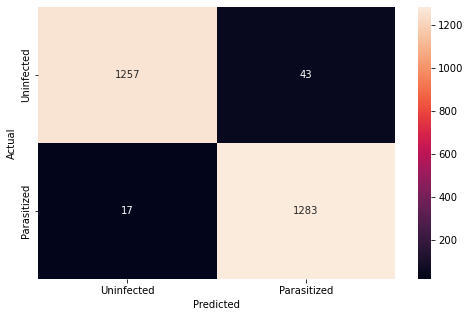

In [53]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

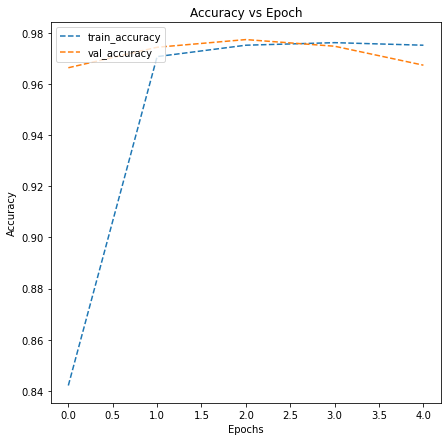

In [54]:
plot_accuracy(history1)

### <b> Model 2 with Batch Normalization

In [93]:
backend.clear_session() # Clearing the backend for new model
np.random.seed(42)
random.seed(42)

tf.random.set_seed(42)

In [56]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU

In [94]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(LeakyReLU(0.1))

model2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))
    
model2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
    
model2.add(LeakyReLU(0.1))
    
model2.add(MaxPooling2D(pool_size = (2, 2)))
    
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512))

model2.add(LeakyReLU(0.1))
    
model2.add(Dropout(0.4))

model2.add(Dense(2, activation = 'softmax'))


adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                          

In [95]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

In [96]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [97]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 91s 145ms/step - loss: 0.4317 - accuracy: 0.8780 - val_loss: 0.0259 - val_accuracy: 0.9970
Epoch 2/20
624/624 [==============================] - 90s 144ms/step - loss: 0.1390 - accuracy: 0.9594 - val_loss: 0.0186 - val_accuracy: 0.9978
Epoch 3/20
624/624 [==============================] - 89s 143ms/step - loss: 0.0929 - accuracy: 0.9736 - val_loss: 0.0549 - val_accuracy: 0.9926
Epoch 4/20
624/624 [==============================] - 92s 147ms/step - loss: 0.0798 - accuracy: 0.9773 - val_loss: 0.1761 - val_accuracy: 0.9661


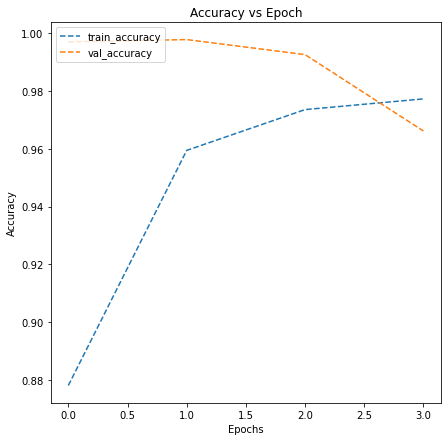

In [98]:
# Plotting the accuracies
plot_accuracy(history2)

In [91]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 3s 31ms/step - loss: 0.1246 - accuracy: 0.9688

 Test_Accuracy:- 0.9688461422920227


#### <b>Observations and insights: 
    
- the accuracy of the model on the validation set has decreased with after 3.5 epochs, while the accuracy on the training set has remained constant. 

82/82 [==============================] - 3s 30ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1300
           1       0.96      0.98      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



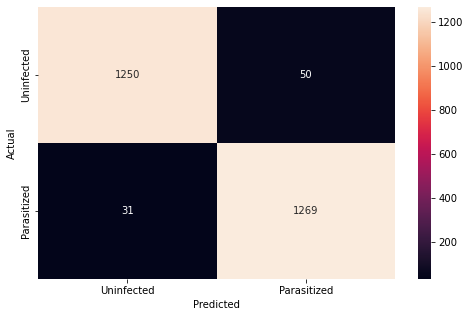

In [99]:
pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### <b>Model 3 with Data Augmentation

In [64]:
backend.clear_session() # Clearing backend for new model


### <b> Using image data generator

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x =X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

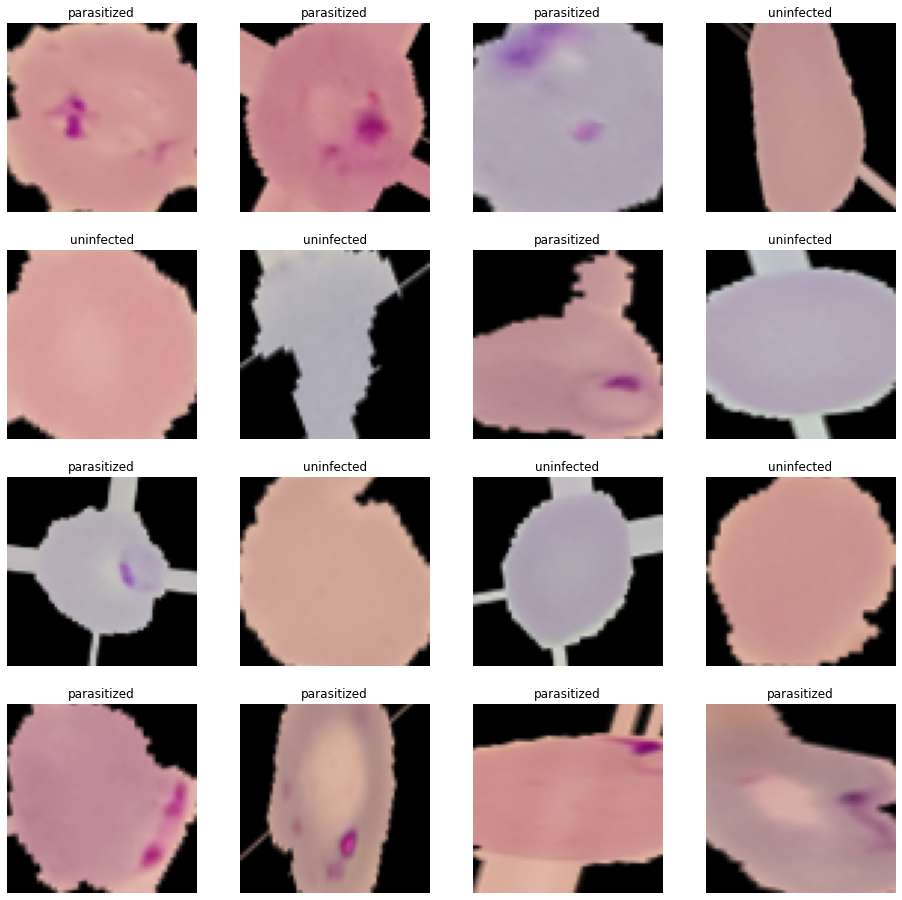

In [66]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

#### <b>Observations and insights: 
   
    - the images visualized are now rotatetd and zoomed, but we can still well differentiate between parasitized and uninfected cells. 

### <b>Building the Model

In [67]:
random.seed(42)

tf.random.set_seed(42)

In [68]:
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss ="binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [69]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [70]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 31s 99ms/step - loss: 0.6206 - accuracy: 0.6575 - val_loss: 0.3026 - val_accuracy: 0.8904
Epoch 2/20
312/312 [==============================] - 31s 98ms/step - loss: 0.2602 - accuracy: 0.9011 - val_loss: 0.1279 - val_accuracy: 0.9611
Epoch 3/20
312/312 [==============================] - 30s 98ms/step - loss: 0.1947 - accuracy: 0.9275 - val_loss: 0.1065 - val_accuracy: 0.9688
Epoch 4/20
312/312 [==============================] - 31s 99ms/step - loss: 0.1933 - accuracy: 0.9341 - val_loss: 0.1402 - val_accuracy: 0.9690
Epoch 5/20
312/312 [==============================] - 30s 97ms/step - loss: 0.1819 - accuracy: 0.9387 - val_loss: 0.1294 - val_accuracy: 0.9567


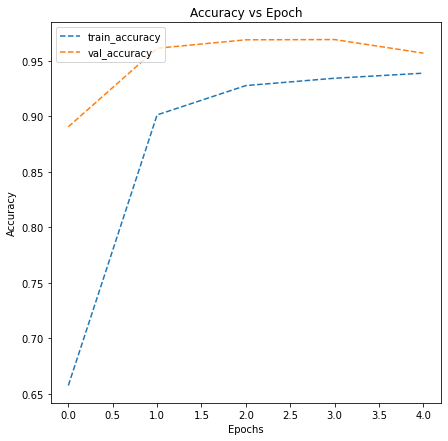

In [71]:
# Potting the accuracies
plot_accuracy(history3)

In [72]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 10ms/step - loss: 0.1900 - accuracy: 0.9331

 Test_Accuracy:- 0.9330769181251526


82/82 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1300
           1       0.97      0.89      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.93      0.93      2600



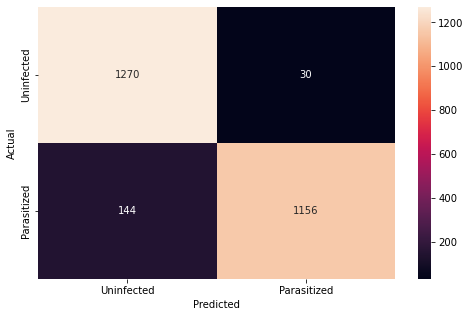

In [73]:
pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [74]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)


random.seed(42)

tf.random.set_seed(42)

In [75]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [76]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

In [77]:
# Compiling the model 
model4.compile(loss = 'categorical_crossentropy',
                
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),

              metrics = ['accuracy'])

In [78]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


In [79]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
624/624 [==============================] - 139s 221ms/step - loss: 0.2695 - accuracy: 0.8941 - val_loss: 0.2692 - val_accuracy: 0.8800
Epoch 2/10
624/624 [==============================] - 137s 220ms/step - loss: 0.1804 - accuracy: 0.9340 - val_loss: 0.6015 - val_accuracy: 0.7328
Epoch 3/10
624/624 [==============================] - 137s 220ms/step - loss: 0.1633 - accuracy: 0.9386 - val_loss: 0.1068 - val_accuracy: 0.9563
Epoch 4/10
624/624 [==============================] - 137s 220ms/step - loss: 0.1533 - accuracy: 0.9439 - val_loss: 0.3117 - val_accuracy: 0.8712
Epoch 5/10
624/624 [==============================] - 137s 220ms/step - loss: 0.1424 - accuracy: 0.9492 - val_loss: 0.1873 - val_accuracy: 0.9139


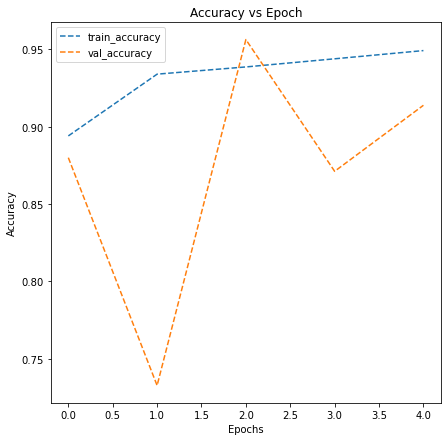

In [80]:
plot_accuracy(history4)

###**Observations and insights: **

*   What can be observed from the validation and train curves?
- the training accuracy remains constant at about 93%
- The validation accuracy varies with the number of epochs, around 75% for 1 epoch, then up to 95% at 2 epochs and went back down to below 90% afterwards.
- Overall the validation accuracy is lower than the trainign accuracy. The model might be overfitting the training data.

In [81]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 15s 175ms/step - loss: 0.1694 - accuracy: 0.9281

 Test_Accuracy:- 0.9280769228935242


82/82 [==============================] - 15s 177ms/step
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1300
           1       0.90      0.96      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



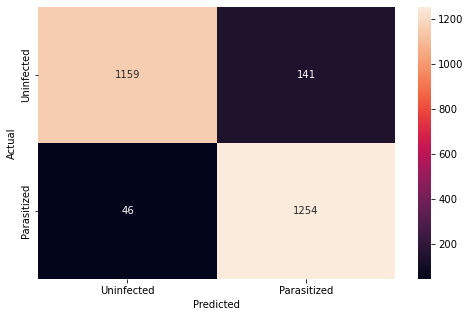

In [82]:
pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### <b>Observations:</b>

- The average precision and recall and F1 score is 93% for this last model, which is overall good but is still lower than other models we tried.


- Although the first model (model) had the best average precision, recall and F1 score of 98%,  this will not be the final model. In fact, model1 has the best recall (99%) for the category (1)- parasitized. As in this problem, we want to minimize the false negatives, since missing the disease and not treating the patient can be fatal. 


82/82 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



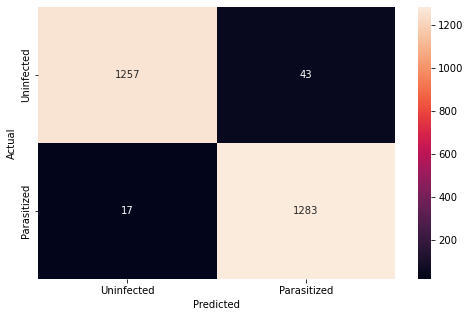

In [83]:
final_model = model1

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

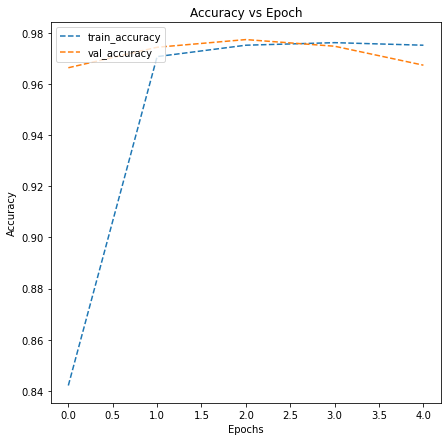

In [84]:
plot_accuracy(history1)

#### <b> Observations and Conclusions drawn from the final model: 
- The training and validation accuracy is very comparable for model1, and is very high around 97%. 
- Model1 has the best recall (99%) for the category (1)- parasitized.  As in this problem, we want to minimize the false negatives, since missing the disease and not treating the patient can be fatal, model1 is chosen.
- The model using data augmentation was unlikely to perform better since the cells do not have a specific orientation.
- The model using transfer learning (VGG-16) did not perform better. This could be explained by the fact that although VGG-16 was trained on medical images, if those images do not apply to our specific case (example: pretrained on XRay or MRI images instead of pathology images), then we cannot expect our model to perform better. 



#### Proposal for the final solution design:
The best model to adopt is model1, since it has an overall accuracy of 98%, with a 99% recall and 97% precision. In fact, since Malaria is a potentially fatal disease, we want to minimize false negatives (minimize the sick people that we will miss, since the outcome can be fatal) and therefore we need to maximize the recall. We also have a very good precision, so we will have few false positives (uninfected people who will be treated, and can have some side effects from the treatment). The stakes of missing a sick individual being higher than incorrectly diagnosing an uninfected person as sick, this is the model to choose.

### Key insights
#### Advantages of Automation
- Automation can help timely and efficiently diagnose a potentially deadly disease to help save lives, especially in         the context of a disease largely affecting countries lacking professional and financial resources. 
- Allocate scarce resources to other diseases 
- Diagnose sooner, which means better chance of survival 
- Building and deploying ML models can be costly at first, but if it completely replaces the human working force or at       least a big part of it, automating this diagnosis can be very cost effective on the long run.

#### Potential risks and challenges
- Potential ethical responsibility and liability when a sick person is missed, and could die.
- This model needs to have a better performance than the current gold standard in order to be deployed

### Other potential solutions
### Running 2 separates tests/models:
- 1 screening model, with a very high recall, but lower precision
- 1 diagnostic model (only on the group identified as positive by the first model), with a very high precision

### Partly automating
- Instead of classifying the cells as infected or non infected, we could have 3 classes, based on the outputted probability
    - High probability of infection
    - Medium probability of infection
    - Low probability of infection
- We could then send the images of cells in the medium probability group to a manual reviewer (professional expert). It       would be a pipeline with human in the loop. 
- Always compare to gold standard before implementation


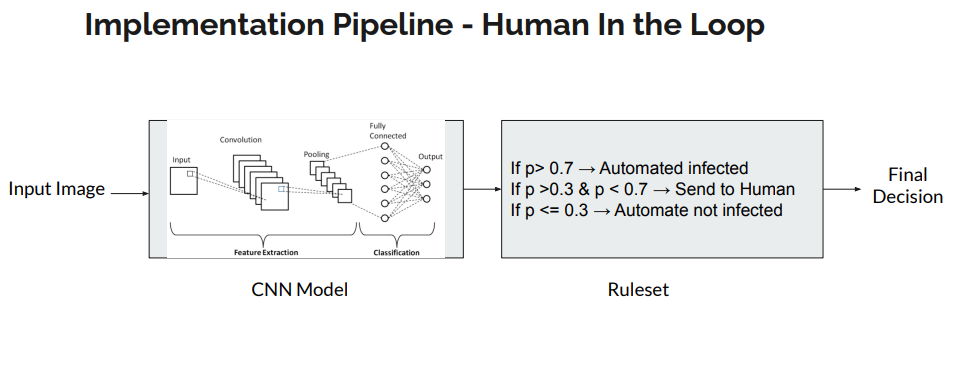